# Assignment1

In [1]:
# MD simulation (In 3D)
# Date : 15-01-2025
# @Shachi
import numpy as np
import matplotlib.pyplot as plt

N=216     # Total no. of particles.(cube root must be integer)
m=1
sig=1
roh=0.8442


## Position init

In [2]:
def posn_initialize(N,sig,roh):
    """
    N: otal no of particles
    sig: diameter
    roh: number density
    This is a function to initialize the positions of the particles in a box, simple qubic(not fcc or bccc).
    Getting box size from N and roh.
    
    """
    n=round(N**(1/3))  # Particles in a line.
    r=sig/2
    x=np.zeros(N)
    y=np.zeros(N)
    z=np.zeros(N)
    volume = N/roh
    l = (volume)**(1/3)  # length of the square box
    dx=(l-sig)/(n-1)
    
    #initialization
    x[0] = y[0] = z[0] = r

    print('Total no of particles = ',N)
    print('radius =',r)
    print('particle in a roh =',n)
    print('distance b/w two particles =',dx)
    print('length of the box =',l)

    with open("initial_posn.xyz", "w") as f:
        f.write('216\n')
        f.write(f"Ar \t X \t\t Y \t\t Z \t\t \n")
    with open("initial_posn.xyz", "a") as f:
        f.write(f"Ar \t {x[0]:.8f}\t{y[0]:.8f}\t{z[0]:.8f} \n")
    
    z_count = 0
    for i in range(1,N):
        # z increasing but y and x reamin same until {read next comment}
        z[i] = z[i-1]+dx
        y[i] = y[i-1]
        x[i] = x[i-1]
        # hit max no of particles in a roh, then z get initial val and increase y (triggering y)
        if (np.mod(i,n)) == 0:
            z[i] = r
            y[i] += dx 
            z_count += 1
            # doing same as previous condition.(tiggering x)
            if ((np.mod(z_count,n)) == 0):
                y[i] = r
                x[i] += dx
        with open("initial_posn.xyz", "a") as f:
            f.write(f"Ar \t {x[i]:.8f}\t{y[i]:.8f}\t{z[i]:.8f} \n")

    return x,y,z
        

In [3]:
# call the function for posn init
x,y,z=posn_initialize(N,sig,roh)
print('Position initialized. Dear particles stay here!!')

Total no of particles =  216
radius = 0.5
particle in a roh = 6
distance b/w two particles = 1.0696951581076473
length of the box = 6.348475790538236
Position initialized. Dear particles stay here!!


## Velocity initialize from normal distribution

In [4]:

N = 216   # Number of particles
def velocity_initialize(N):
    """
    This function for initialize initial velocity of N particles from 
    normal distribution.
    And also plot the distribution of them and compare with theoritiacl expected curve.
    Finally put initial velicity in a file.
    """

    # Parameters of the normal distribution
    mean = 0      
    k_B=1.0
    T=1.0
    # Standard deviation 
    std_dev = k_B*T   
    bins=int(np.round(np.sqrt(N)))    # generally we take sqrt(points) no of bins
    print('no of bins = ',bins)
    print('We will get more accurate distribution for large no of particles')
    
    # velocity from random numbers
    vx = np.random.normal(mean, std_dev, N)
    vy = np.random.normal(mean, std_dev, N)
    vz = np.random.normal(mean, std_dev, N)
    # speed
    v=np.sqrt(vx**2 + vy**2 + vz**2)
    
    # save in an file 
    for i in range(N):
        with open("initial_velo.txt", "a") as f:
            f.write(f"{vx[i]:.8f}\t{vy[i]:.8f}\t{vz[i]:.8f} \n")
    
    plt.figure(figsize=(10, 8))
    
    # First subplot
    plt.subplot(2, 2, 1)  
    plt.hist(vx, bins=bins, density=True, alpha=0.9, color='b')
    plt.title("Histogram of $V_x$ Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid()
    # Plot the theoretical normal distribution curve
    x1 = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mean) / std_dev)**2)
    plt.plot(x1, pdf, 'r', linewidth=2, label="Normal Distribution ")
    plt.legend()
    
    plt.subplot(2, 2, 2)  
    plt.hist(vy, bins=bins, density=True, alpha=0.9, color='b')
    plt.title("Histogram of $V_y$ Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid()
    # Plot the theoretical normal distribution curve
    x1 = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mean) / std_dev)**2)
    plt.plot(x1, pdf, 'r', linewidth=2, label="Normal Distribution ")
    
    
    
    plt.subplot(2, 2, 3)  
    plt.hist(vz, bins=bins, density=True, alpha=0.9, color='b')
    plt.title("Histogram of $V_z$ Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid()
    # Plot the theoretical normal distribution curve
    x1 = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mean) / std_dev)**2)
    plt.plot(x1, pdf, 'r', linewidth=2, label="Normal Distribution ")
    
    
    plt.subplot(2, 2, 4) 
    plt.hist(v, bins=bins, density=True, alpha=0.9, color='b')
    plt.title("Histogram of speed Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid()
    # Plot the theoretical MB distribution at same Temprature
    x1 = np.linspace(0, 8, 1000)
    pdf = 4 * np.pi * x1**2 * (m / (2 * np.pi * k_B * T))**1.5 * np.exp(-m * x1**2 / (2 * k_B * T))
    plt.plot(x1, pdf, 'r', linewidth=2, label="MB Distribution")
    plt.legend()
    
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    
    print()
    return vx,vy,vz



no of bins =  15
We will get more accurate distribution for large no of particles


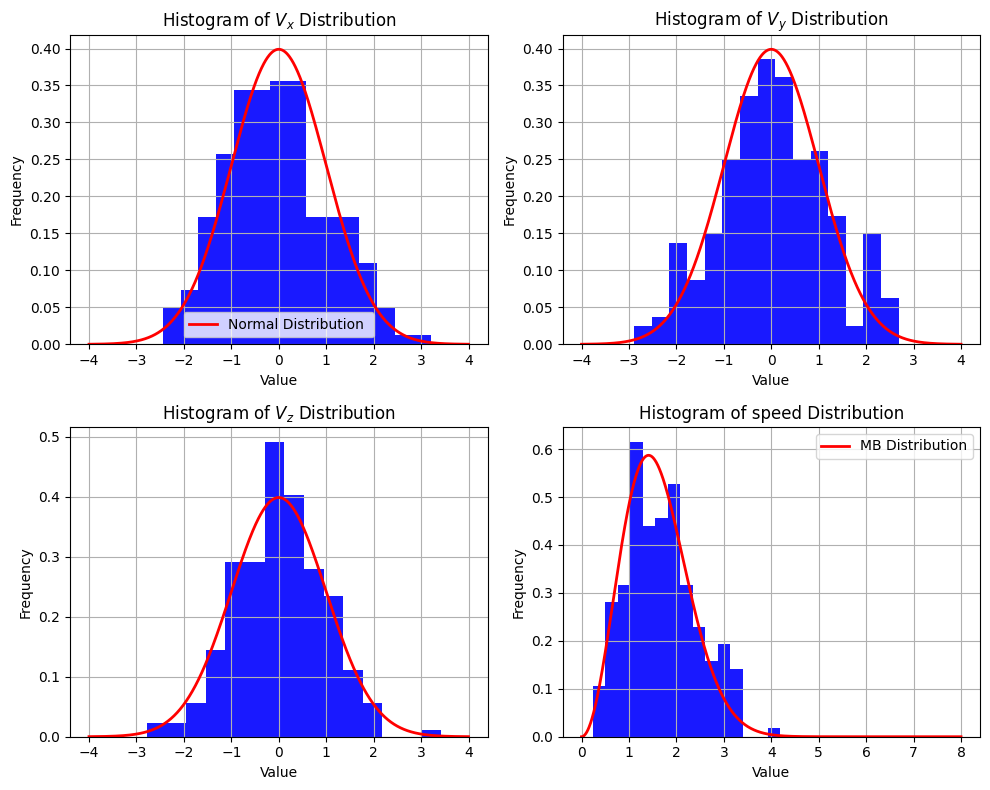


Velocity initialized. Dear particles get rady to go!!


In [5]:
# call the function for velocity init
vx,vy,vz=velocity_initialize(N)
print('Velocity initialized. Dear particles get rady to go!!')

## 3D scatter plot (DONT NEED we use VMD)

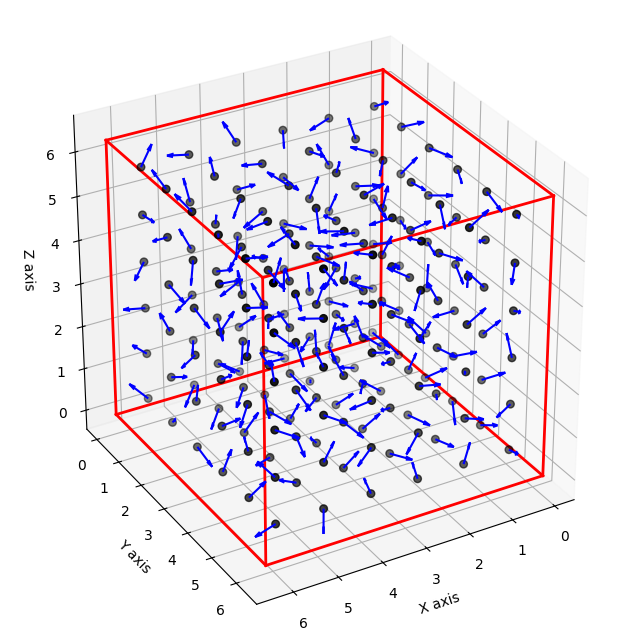

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
l=6.348475790538236

# Cube vertices
vertices = np.array([
    [0, 0, 0], [l, 0, 0], [l, l, 0], [0, l, 0],  # Bottom face
    [0, 0, l], [l, 0, l], [l, l, l], [0, l, l]  # Top face
])

# Cube edges (connect the vertices)
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # Bottom face edges
    [4, 5], [5, 6], [6, 7], [7, 4],  # Top face edges
    [0, 4], [1, 5], [2, 6], [3, 7]   # Vertical edges
]

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points 
ax.scatter(x, y, z, color='k', s=30)  # Scatter points
v=np.sqrt(vx**2 + vy**2 + vz**2)
vx=vx/v
vy=vy/v
vz=vz/v
ax.quiver(x, y, z, vx, vy, vz, length=0.5, color='blue', label="Velocity Vectors")

# Plot the cube edges
for edge in edges:
    ax.plot([vertices[edge[0], 0], vertices[edge[1], 0]],
            [vertices[edge[0], 1], vertices[edge[1], 1]],
            [vertices[edge[0], 2], vertices[edge[1], 2]], color='red', linewidth=2)

# Set view angle and labels
ax.view_init(elev=30, azim=60)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Optional: Set aspect ratio (aspect ratio may not be exact in 3D)
ax.set_box_aspect([1, 1, 1])

# Show the plot
plt.show()